https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_classification, make_blobs
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split

X shape: (200, 2)
y: [0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0
 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0
 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1
 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0
 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1]


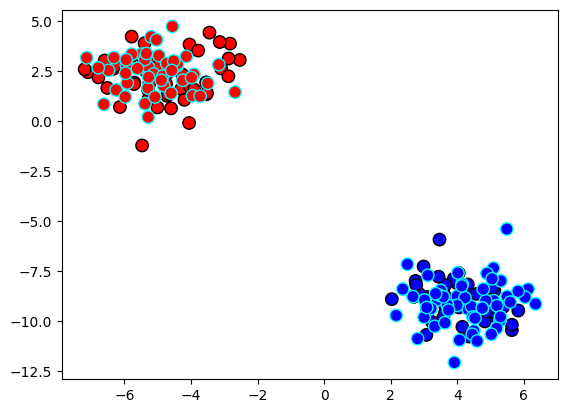

In [50]:
## Linear Separable Data
X, y = make_blobs(
    n_samples=200,
    n_features=2,
    centers=2,
    cluster_std=1,
    random_state=203985 # 본인학번 187182
)

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.5, 
    random_state=0 # 0으로 고정
) 


print("X shape:", X.shape)
print("y:", y)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.bwr, s=80, edgecolor='k')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.bwr, s=80, edgecolor='cyan')
plt.show()

n iter: [3]
n support: [1 1]


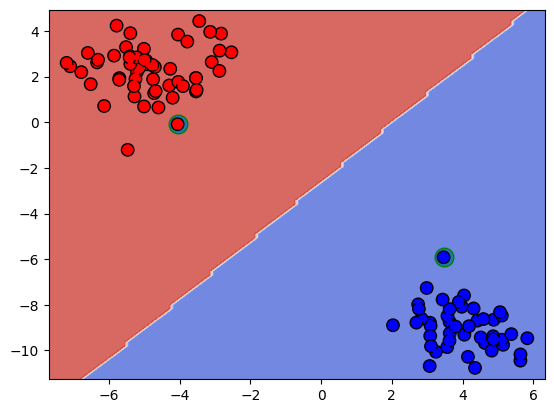

train acc: 1.0


In [51]:
model = SVC(
    C = 1e0,
    kernel = 'linear',
    tol=1e-3,
    max_iter=-1,
    decision_function_shape='ovr',
    random_state=0, # 시드는 0으로 고정
)

model.fit(X_train,y_train)
pred_train = model.predict(X_train)

print("n iter:", model.n_iter_)
print("n support:", model.n_support_)

DecisionBoundaryDisplay.from_estimator(
            model, X_train, grid_resolution=100, response_method="predict", cmap=plt.cm.coolwarm, alpha=0.8, eps=0.5
)
plt.scatter(X_train[model.support_,0], X_train[model.support_,1], s=180, edgecolor='g')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.bwr, s=80, edgecolor='k')
plt.scatter(X_train[:,0], X_train[:,1], c=pred_train, cmap=plt.cm.bwr, s=10)
plt.show()

print("train acc:", np.sum(pred_train==y_train) / len(y_train) )

test acc: 1.0


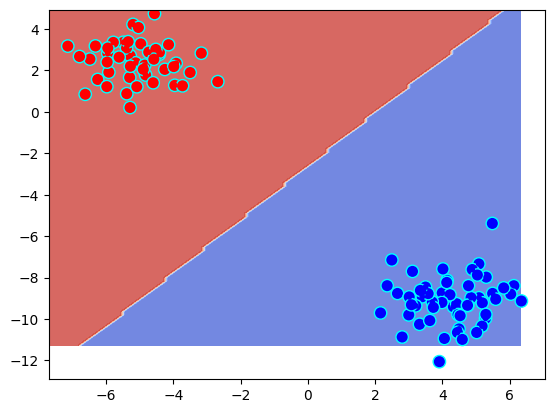

In [52]:
pred_test = model.predict(X_test)
print("test acc:", np.sum(pred_test==y_test) / len(y_test) )

DecisionBoundaryDisplay.from_estimator(
            model, X_train, grid_resolution=100, response_method="predict", cmap=plt.cm.coolwarm, alpha=0.8, eps=0.5
)

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.bwr, s=80, edgecolor='cyan')
plt.scatter(X_test[:,0], X_test[:,1], c=pred_test, cmap=plt.cm.bwr, s=10)
plt.show()



X shape: (200, 2)
y: [1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0
 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0
 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0
 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0]


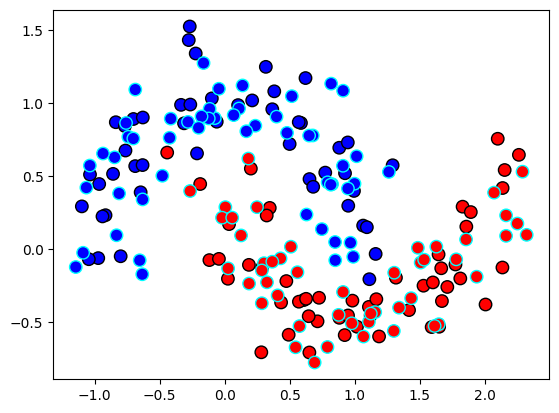

In [53]:
## Moon Data
X, y = make_moons(n_samples=200,
                noise=0.2, 
                shuffle=True, 
                random_state=203985 #본인학번이용
                )
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.5, 
    random_state=0 # 0으로 고정
) 


print("X shape:", X.shape)
print("y:", y)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.bwr, s=80, edgecolor='k')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.bwr, s=80, edgecolor='cyan')
plt.show()

In [54]:
## Poly 커널과, RBF 커널로 / 파라미터를 변경해 가며 결과 분석

n iter: [360]
n support: [17 17]


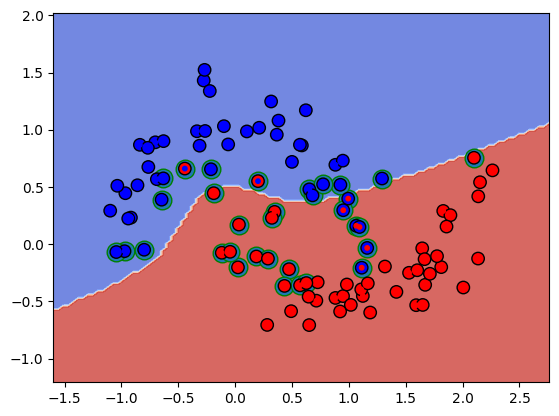

train acc: 0.92
test acc: 0.91


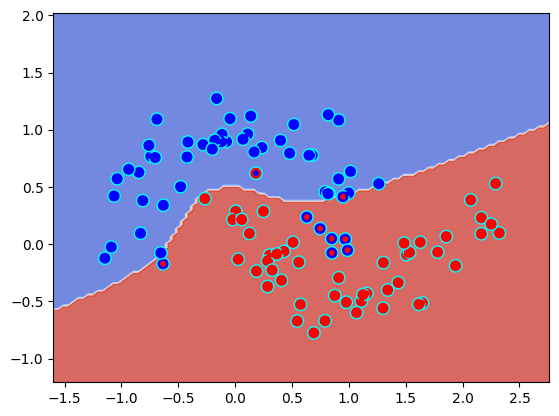

In [64]:
# Moon Data에서 Polynomial 커널을 이용한 SVM을 학습
model = SVC(
    C = 1e1,
    kernel = 'poly',
    degree = 3,
    tol=1e-3,
    max_iter=-1,
    decision_function_shape='ovr',
    random_state=0, # 시드는 0으로 고정
)

model.fit(X_train,y_train)
pred_train = model.predict(X_train)

print("n iter:", model.n_iter_)
print("n support:", model.n_support_)

DecisionBoundaryDisplay.from_estimator(
            model, X_train, grid_resolution=100, response_method="predict", cmap=plt.cm.coolwarm, alpha=0.8, eps=0.5
)
plt.scatter(X_train[model.support_,0], X_train[model.support_,1], s=180, edgecolor='g')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.bwr, s=80, edgecolor='k')
plt.scatter(X_train[:,0], X_train[:,1], c=pred_train, cmap=plt.cm.bwr, s=10)
plt.show()

print("train acc:", np.sum(pred_train==y_train) / len(y_train) )

pred_test = model.predict(X_test)
print("test acc:", np.sum(pred_test==y_test) / len(y_test) )

DecisionBoundaryDisplay.from_estimator(
            model, X_train, grid_resolution=100, response_method="predict", cmap=plt.cm.coolwarm, alpha=0.8, eps=0.5
)

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.bwr, s=80, edgecolor='cyan')
plt.scatter(X_test[:,0], X_test[:,1], c=pred_test, cmap=plt.cm.bwr, s=10)
plt.show()



n iter: [54]
n support: [6 8]


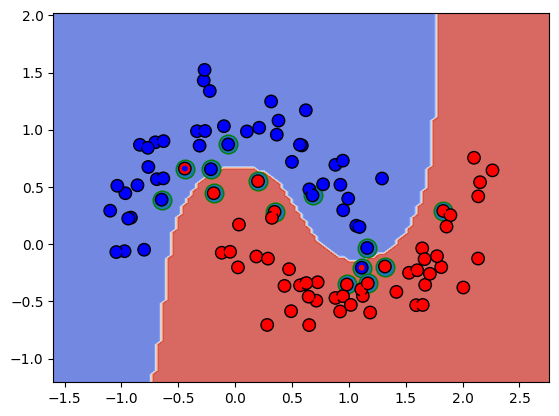

train acc: 0.98
test acc: 1.0


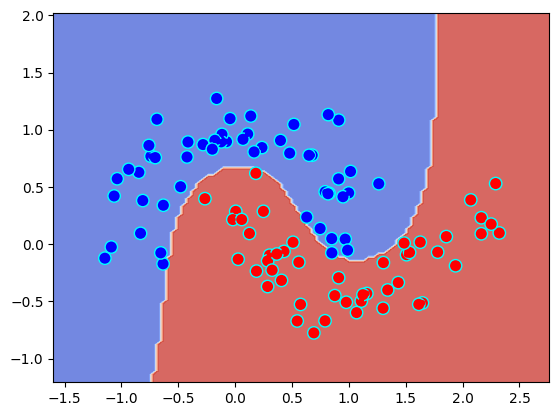

In [84]:
# Moon Data에서 Radial Basis Function 커널을 이용한 SVM을 학습
model = SVC(
    C = 1e1,
    kernel = 'rbf',
    gamma = 1,
    tol=1e-3,
    max_iter=-1,
    decision_function_shape='ovr',
    random_state=0, # 시드는 0으로 고정
)

model.fit(X_train,y_train)
pred_train = model.predict(X_train)

print("n iter:", model.n_iter_)
print("n support:", model.n_support_)

DecisionBoundaryDisplay.from_estimator(
            model, X_train, grid_resolution=100, response_method="predict", cmap=plt.cm.coolwarm, alpha=0.8, eps=0.5
)
plt.scatter(X_train[model.support_,0], X_train[model.support_,1], s=180, edgecolor='g')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.bwr, s=80, edgecolor='k')
plt.scatter(X_train[:,0], X_train[:,1], c=pred_train, cmap=plt.cm.bwr, s=10)
plt.show()

print("train acc:", np.sum(pred_train==y_train) / len(y_train) )

pred_test = model.predict(X_test)
print("test acc:", np.sum(pred_test==y_test) / len(y_test) )

DecisionBoundaryDisplay.from_estimator(
            model, X_train, grid_resolution=100, response_method="predict", cmap=plt.cm.coolwarm, alpha=0.8, eps=0.5
)

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.bwr, s=80, edgecolor='cyan')
plt.scatter(X_test[:,0], X_test[:,1], c=pred_test, cmap=plt.cm.bwr, s=10)
plt.show()



n iter: [54]
n support: [6 8]


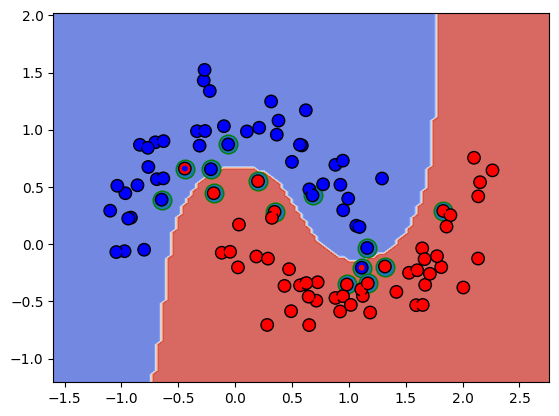

train acc: 0.98
test acc: 1.0


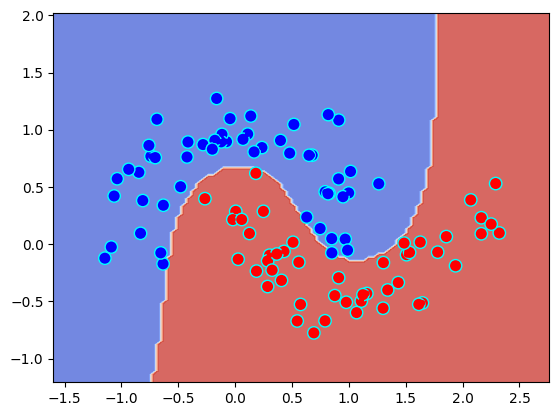

In [ ]:
# Moon Data에서 Radial Basis Function 커널을 이용한 SVM을 학습
model = SVC(
    C = 1e1,
    kernel = 'rbf',
    gamma = 1,
    tol=1e-3,
    max_iter=-1,
    decision_function_shape='ovr',
    random_state=0, # 시드는 0으로 고정
)

model.fit(X_train,y_train)
pred_train = model.predict(X_train)

print("n iter:", model.n_iter_)
print("n support:", model.n_support_)

DecisionBoundaryDisplay.from_estimator(
            model, X_train, grid_resolution=100, response_method="predict", cmap=plt.cm.coolwarm, alpha=0.8, eps=0.5
)
plt.scatter(X_train[model.support_,0], X_train[model.support_,1], s=180, edgecolor='g')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.bwr, s=80, edgecolor='k')
plt.scatter(X_train[:,0], X_train[:,1], c=pred_train, cmap=plt.cm.bwr, s=10)
plt.show()

print("train acc:", np.sum(pred_train==y_train) / len(y_train) )

pred_test = model.predict(X_test)
print("test acc:", np.sum(pred_test==y_test) / len(y_test) )

DecisionBoundaryDisplay.from_estimator(
            model, X_train, grid_resolution=100, response_method="predict", cmap=plt.cm.coolwarm, alpha=0.8, eps=0.5
)

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.bwr, s=80, edgecolor='cyan')
plt.scatter(X_test[:,0], X_test[:,1], c=pred_test, cmap=plt.cm.bwr, s=10)
plt.show()

